12.1.2.1

https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/finite-element-analysis/fea-in-one-dimension/one-dimensional-linear-elements/

'u_exact(x) ='

-x**3/6 + 0.5*x

's_exact(x) ='

0.5 - x**2/2

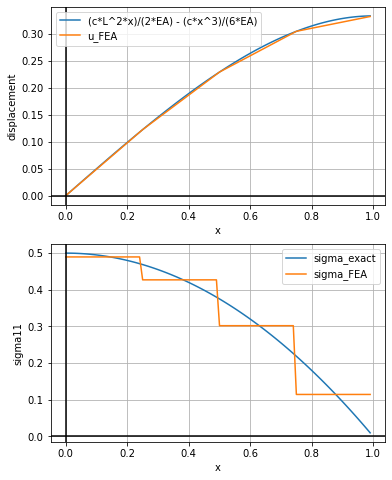

In [1]:
import sympy as sp
import numpy as np
from sympy import lambdify
from matplotlib import pyplot as plt
x = sp.symbols("x")
xL = np.arange(0,1,0.01)
c,L,EA = 1,1,1
# Exact Calculations
u_exact = c*L**2/2/EA*x - c/sp.Rational("6")/EA*x**3
s_exact = u_exact.diff(x)
display("u_exact(x) =",u_exact,"s_exact(x) =",s_exact)
F = lambdify(x,u_exact)
dF = lambdify(x,s_exact)
y_exact = F(xL)
sy_exact = dF(xL)
def PN1(x):
    conds = [(x>=0)&(x<=L/4),(x>=L/4)&(x<L/2)]
    functions = [lambda x:4*x/L,lambda x:4/L*(L/2-x)]
    Dfunctions = [lambda x:4/L,lambda x:-4]
    return np.piecewise(x,conds,functions), np.piecewise(x,conds,Dfunctions)
def PN2(x):
    conds = [(x>=L/4)&(x<=L/2),(x>=L/2)&(x<3*L/4)]
    functions = [lambda x:4/L*(-L/4+x),lambda x:4/L*(3*L/4-x)]
    Dfunctions = [lambda x:4/L,lambda x:-4]
    return np.piecewise(x,conds,functions), np.piecewise(x,conds,Dfunctions)
def PN3(x):
    conds = [(x>=L/2)&(x<=3*L/4),(x>=3*L/4)&(x<=L)]
    functions = [lambda x:4/L*(-L/2+x),lambda x:4/L*(L-x)]
    Dfunctions = [lambda x:4/L,lambda x:-4]
    return np.piecewise(x,conds,functions), np.piecewise(x,conds,Dfunctions)
def PN4(x):
    conds = [(x>=3*L/4)&(x<=L)]
    functions = [lambda x:4/L*(-3*L/4+x)]
    Dfunctions = [lambda x:4/L]
    return np.piecewise(x,conds,functions), np.piecewise(x,conds,Dfunctions)
N1, DN1 = PN1(xL)
N2, DN2 = PN2(xL)
N3, DN3 = PN3(xL)
N4, DN4 = PN4(xL)
u1 = c*L**3/EA*(47/384)
u2 = c*L**3/EA*(11/48)
u3 = c*L**3/EA*(39/128)
u4 = c*L**3/EA*(1/3)
u = u1*N1+u2*N2+u3*N3+u4*N4
up = u1*DN1+u2*DN2+u3*DN3+u4*DN4
fig, ax = plt.subplots(2, figsize=(6,8))
ax[0].set_title("")
ax[0].set_xlabel("x")
ax[0].set_ylabel("displacement")
ax[0].plot(xL,y_exact,label="(c*L^2*x)/(2*EA) - (c*x^3)/(6*EA)")
ax[0].plot(xL,u,label="u_FEA")
ax[1].plot(xL,sy_exact,label="sigma_exact")
ax[1].plot(xL,up,label="sigma_FEA")
ax[1].set_ylabel("sigma11")
for i in ax:
    i.grid(True, which='both')
    i.axhline(y = 0, color = 'k')
    i.axvline(x = 0, color = 'k')
    i.set_xlabel("x")
    i.legend()

12.1.3.1

https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/finite-element-analysis/fea-in-one-dimension/one-dimensional-quadratic-elements/

In [2]:
import sympy as sp
from sympy import solve,Matrix,diff,integrate
a0,a1,a2,x,L,EA,p = sp.symbols("a_0 a_1 a_2 x L EA p")
u1,u2,u3 = sp.symbols("u_1 u_2 u_3")
u = a0+a1*x+a2*x**2
display("Quadratic Form of Displacement:")
display("u =", u)
eq1 = u.subs({x:0})
eq2 = u.subs({x:L/2})
eq3 = u.subs({x:L})
s = solve((eq1-u1,eq2-u2,eq3-u3),a0,a1,a2)
display("Solve")
display("a_0 =",s[a0],"a_1 =",s[a1],"a_2 =",s[a2])
u = u.subs(s).expand()
display("Rearranging")
display("u =",u)
N1 = u.coeff(u1)
N2 = u.coeff(u2)
N3 = u.coeff(u3)
display("Shape Functions")
B = Matrix([[diff(N1,x),diff(N2,x),diff(N3,x)]])
display("B =",B.T)
K = EA*Matrix([[integrate(B[i]*B[j], (x,0,L)) for i in range(3)] for j in range(3)])
display("K^e =",K)
Nn = Matrix([[N1,N2,N3]]).T
display("N =",Nn)
fe = Matrix([p*integrate(Nn[i],(x,0,L))for i in range(3)])
display("Nodal Force Vector")
display("f^e =",fe)

'Quadratic Form of Displacement:'

'u ='

a_0 + a_1*x + a_2*x**2

'Solve'

'a_0 ='

u_1

'a_1 ='

(-3*u_1 + 4*u_2 - u_3)/L

'a_2 ='

2*(u_1 - 2*u_2 + u_3)/L**2

'Rearranging'

'u ='

u_1 - 3*u_1*x/L + 4*u_2*x/L - u_3*x/L + 2*u_1*x**2/L**2 - 4*u_2*x**2/L**2 + 2*u_3*x**2/L**2

'Shape Functions'

'B ='

Matrix([
[-3/L + 4*x/L**2],
[ 4/L - 8*x/L**2],
[-1/L + 4*x/L**2]])

'K^e ='

Matrix([
[ 7*EA/(3*L), -8*EA/(3*L),    EA/(3*L)],
[-8*EA/(3*L), 16*EA/(3*L), -8*EA/(3*L)],
[   EA/(3*L), -8*EA/(3*L),  7*EA/(3*L)]])

'N ='

Matrix([
[1 - 3*x/L + 2*x**2/L**2],
[    4*x/L - 4*x**2/L**2],
[     -x/L + 2*x**2/L**2]])

'Nodal Force Vector'

'f^e ='

Matrix([
[  L*p/6],
[2*L*p/3],
[  L*p/6]])